Make a stat plot for the production of items

In [132]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [133]:
pathToData = os.path.join(os.getcwd(), "Data", "Production_Crops_Livestock_E_All_Data.csv")
agData = pd.read_csv(pathToData, encoding="latin-1")
agData.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,19481.0,NaN,19793.0,NaN,20053.0,NaN,29203.0,NaN,22134.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,16859.0,Fc,13788.0,Fc,17161.0,Fc,13083.0,Fc,17759.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,32843.0,NaN,27291.0,NaN,34413.0,NaN,38205.0,NaN,39307.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,24500.0,Im,26500.0,Im,25333.0,Im,25444.0,Im,25759.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,7075.0,Fc,7149.0,Fc,7142.0,Fc,7123.0,Fc,7138.0,Fc


In [134]:
agData.columns

Index(['Area Code', 'Area', 'Item Code', 'Item', 'Element Code', 'Element',
       'Unit', 'Y1961', 'Y1961F', 'Y1962',
       ...
       'Y2016', 'Y2016F', 'Y2017', 'Y2017F', 'Y2018', 'Y2018F', 'Y2019',
       'Y2019F', 'Y2020', 'Y2020F'],
      dtype='object', length=127)

In [135]:
def cropData(df, agItem):
    """
        Filter the data for a specific crop/food. 
        Argument:
            df: the dataframe
            agItem: String, the crop/food to filter for. 
        Return: the agriculture data filtered by the crop/food.     
    """
    return df[df["Item"] == agItem]

def getYearData(df, year1, year2):
    """
        Get the year columns between year1 and year2
        Arguments:
            df: the dataframe
            year1: integer, the beginning year column
            year2: integer, the ending year column
        Return: the ag data with the year columns only    
    """
    getCols = ["Area Code", "Area", "Item", "Element", "Unit"]
    for y in range(year1, year2 + 1):
        getCols.append("Y" + str(y))
    
    return df[getCols] 

In [136]:
# See what crops there are to choose from
itemsInData = sorted(agData["Item"].unique())
print(itemsInData)

['Agave fibres nes', 'Almonds, with shell', 'Anise, badian, fennel, coriander', 'Apples', 'Apricots', 'Areca nuts', 'Artichokes', 'Asparagus', 'Asses', 'Avocados', 'Bambara beans', 'Bananas', 'Barley', 'Bastfibres, other', 'Beans, dry', 'Beans, green', 'Beef and Buffalo Meat', 'Beehives', 'Beer of barley', 'Beeswax', 'Berries nes', 'Blueberries', 'Brazil nuts, with shell', 'Broad beans, horse beans, dry', 'Buckwheat', 'Buffaloes', 'Butter and Ghee', 'Butter and ghee, sheep milk', 'Butter, buffalo milk', 'Butter, cow milk', 'Butter, goat milk', 'Cabbages and other brassicas', 'Camelids, other', 'Camels', 'Canary seed', 'Carobs', 'Carrots and turnips', 'Cashew nuts, with shell', 'Cashewapple', 'Cassava', 'Cassava leaves', 'Castor oil seed', 'Cattle', 'Cattle and Buffaloes', 'Cauliflowers and broccoli', 'Cereals nes', 'Cereals, Total', 'Cheese (All Kinds)', 'Cheese, buffalo milk', 'Cheese, goat milk', 'Cheese, sheep milk', 'Cheese, skimmed cow milk', 'Cheese, whole cow milk', 'Cherries', 

# Stack Plot Orange Production

In [137]:
agDataOranges = cropData(agData, "Oranges")
agDataOranges = getYearData(agDataOranges, 2000, 2020)
agDataOranges = agDataOranges[agDataOranges["Element"] == "Production"]
agDataOranges.head()

,Area Code,Area,Item,Element,Unit,Y2000,Y2001,Y2002,Y2003,Y2004,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
129,2,Afghanistan,Oranges,Production,tonnes,11241.0,11133.0,11023.0,13503.0,10800.0,...,6000.0,6000.0,6320.0,6930.0,4926.0,5282.0,4483.0,5600.0,5783.0,3001.0
435,3,Albania,Oranges,Production,tonnes,2600.0,2800.0,3400.0,4400.0,4900.0,...,7100.0,9120.0,9665.0,4120.0,8347.0,10063.0,9130.0,10779.0,11556.0,12436.0
781,4,Algeria,Oranges,Production,tonnes,299583.0,327083.0,362490.0,389372.0,417150.0,...,814740.0,802517.0,890674.0,955206.0,1005079.0,892764.0,1013951.0,1134194.0,1199535.0,1174845.0
1557,9,Argentina,Oranges,Production,tonnes,787096.0,918294.0,766854.0,687346.0,770000.0,...,1130074.0,933526.0,859752.0,1022276.0,1001309.0,1032446.0,1025000.0,1006779.0,1026862.0,1040114.0
2224,10,Australia,Oranges,Production,tonnes,509973.0,550200.0,450559.0,599484.0,395164.0,...,291223.0,389799.0,400554.0,350000.0,337636.0,398610.0,332321.0,378233.0,343028.0,382980.0


In [138]:
# All data in tonnes
agDataOranges["Unit"].unique()

array(['tonnes'], dtype=object)

In [139]:
agData[agData["Area"] == "China"]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F,Y2019,Y2019F,Y2020,Y2020F
9848,351,China,221,"Almonds, with shell",5312,Area harvested,ha,NaN,A,NaN,...,13194.0,A,12853.0,A,12522.0,A,12822.0,A,12551.0,A
9849,351,China,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,32796.0,Fc,33455.0,Fc,34340.0,Fc,35096.0,Fc,35854.0,Fc
9850,351,China,221,"Almonds, with shell",5510,Production,tonnes,5000.0,A,5500.0,...,43271.0,A,43000.0,A,43000.0,A,45000.0,A,45000.0,A
9851,351,China,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,A,NaN,...,38811.0,A,39248.0,A,39454.0,A,39171.0,A,39291.0,A
9852,351,China,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,12795.0,Fc,12861.0,Fc,12896.0,Fc,12851.0,Fc,12869.0,Fc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10436,351,China,1729,"Treenuts, Total",5419,Yield,hg/ha,NaN,NaN,NaN,...,45279.0,Fc,46543.0,Fc,47202.0,Fc,46955.0,Fc,47003.0,Fc
10437,351,China,1729,"Treenuts, Total",5510,Production,tonnes,187000.0,A,190000.0,...,2942771.0,A,3008996.0,A,2857630.0,A,3017436.0,A,3132645.0,A
10438,351,China,1735,Vegetables Primary,5312,Area harvested,ha,5005465.0,A,4469864.0,...,22995320.0,A,23177292.0,A,23348600.0,A,23255644.0,A,23336106.0,A
10439,351,China,1735,Vegetables Primary,5419,Yield,hg/ha,NaN,NaN,NaN,...,243415.0,Fc,248586.0,Fc,248896.0,Fc,252508.0,Fc,255469.0,Fc


The Area column includes data rolled into regions like "Western Europe" and "Europe". On the FAO website Definitions and Standards, Area Code = Country Code, and anything with Area Code 420 and above is a region. 

In [140]:
# Area code is an int
agDataOranges.dtypes

Area Code      int64
Area          object
Item          object
Element       object
Unit          object
Y2000        float64
Y2001        float64
Y2002        float64
Y2003        float64
Y2004        float64
Y2005        float64
Y2006        float64
Y2007        float64
Y2008        float64
Y2009        float64
Y2010        float64
Y2011        float64
Y2012        float64
Y2013        float64
Y2014        float64
Y2015        float64
Y2016        float64
Y2017        float64
Y2018        float64
Y2019        float64
Y2020        float64
dtype: object

In [141]:
agDataOranges = agDataOranges[agDataOranges["Area Code"] < 420]
print("Europe" in agDataOranges["Area"], "Upper-middle-income economies" in agDataOranges["Area"])

False False


In [142]:
agDataOranges.head(5)

,Area Code,Area,Item,Element,Unit,Y2000,Y2001,Y2002,Y2003,Y2004,...,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020
129,2,Afghanistan,Oranges,Production,tonnes,11241.0,11133.0,11023.0,13503.0,10800.0,...,6000.0,6000.0,6320.0,6930.0,4926.0,5282.0,4483.0,5600.0,5783.0,3001.0
435,3,Albania,Oranges,Production,tonnes,2600.0,2800.0,3400.0,4400.0,4900.0,...,7100.0,9120.0,9665.0,4120.0,8347.0,10063.0,9130.0,10779.0,11556.0,12436.0
781,4,Algeria,Oranges,Production,tonnes,299583.0,327083.0,362490.0,389372.0,417150.0,...,814740.0,802517.0,890674.0,955206.0,1005079.0,892764.0,1013951.0,1134194.0,1199535.0,1174845.0
1557,9,Argentina,Oranges,Production,tonnes,787096.0,918294.0,766854.0,687346.0,770000.0,...,1130074.0,933526.0,859752.0,1022276.0,1001309.0,1032446.0,1025000.0,1006779.0,1026862.0,1040114.0
2224,10,Australia,Oranges,Production,tonnes,509973.0,550200.0,450559.0,599484.0,395164.0,...,291223.0,389799.0,400554.0,350000.0,337636.0,398610.0,332321.0,378233.0,343028.0,382980.0


In [143]:
#sum of each year
yearColumns = ["Y" + str(y) for y in range(2000, 2021)]

yearDataArr = []
statsDict = {}

for yearCol in yearColumns:
    arr = agDataOranges[yearCol].to_numpy()
    arr[np.isnan(arr)] = 0
    yearDataArr.append(arr)
    statsDict[yearCol] = {"sum" : np.sum(arr), "mean": np.mean(arr), "median": np.median(arr)}
    

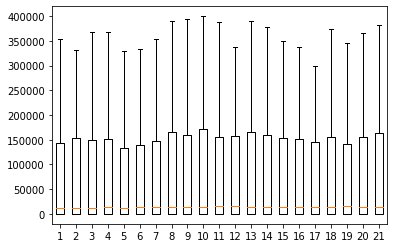

In [144]:
fig, ax = plt.subplots()
ax.boxplot(yearDataArr, showfliers=False)
plt.show()

In [145]:
print(statsDict)

{'Y2000': {'sum': 65031881.0, 'mean': 442393.7482993197, 'median': 12185.0}, 'Y2001': {'sum': 61634456.0, 'mean': 419282.0136054422, 'median': 12198.0}, 'Y2002': {'sum': 63712345.0, 'mean': 433417.31292517006, 'median': 12212.0}, 'Y2003': {'sum': 61867578.0, 'mean': 420867.8775510204, 'median': 13037.0}, 'Y2004': {'sum': 67275766.0, 'mean': 457658.27210884355, 'median': 12400.0}, 'Y2005': {'sum': 65877723.0, 'mean': 448147.7755102041, 'median': 13039.0}, 'Y2006': {'sum': 68465568.0, 'mean': 465752.1632653061, 'median': 13610.0}, 'Y2007': {'sum': 68945262.0, 'mean': 469015.387755102, 'median': 13651.0}, 'Y2008': {'sum': 73491382.0, 'mean': 499941.3741496599, 'median': 13500.0}, 'Y2009': {'sum': 73256473.0, 'mean': 498343.3537414966, 'median': 14000.0}, 'Y2010': {'sum': 76335259.0, 'mean': 519287.4761904762, 'median': 15138.0}, 'Y2011': {'sum': 79310834.0, 'mean': 539529.4829931973, 'median': 15092.0}, 'Y2012': {'sum': 77569655.0, 'mean': 527684.7278911564, 'median': 14560.0}, 'Y2013': {

In [146]:
# For each year, drop values less than the median, since production is heavily skewed right (lot of small producers)
agDataCopy = agDataOranges.copy();
agDataCopy = pd.melt(agDataCopy, id_vars = ["Area Code", "Area", "Item", "Element", "Unit"], value_vars = yearColumns,
                    value_name="Amount")
agDataCopy[agDataCopy['Area'] == "China"]

,Area Code,Area,Item,Element,Unit,variable,Amount
23,351,China,Oranges,Production,tonnes,Y2000,1180631.0
170,351,China,Oranges,Production,tonnes,Y2001,1487609.0
317,351,China,Oranges,Production,tonnes,Y2002,1643469.0
464,351,China,Oranges,Production,tonnes,Y2003,2013132.0
611,351,China,Oranges,Production,tonnes,Y2004,2332836.0
758,351,China,Oranges,Production,tonnes,Y2005,2740931.0
905,351,China,Oranges,Production,tonnes,Y2006,3075070.0
1052,351,China,Oranges,Production,tonnes,Y2007,3689311.0
1199,351,China,Oranges,Production,tonnes,Y2008,4191040.0
1346,351,China,Oranges,Production,tonnes,Y2009,4864956.0


In [147]:
agDataOranges = pd.melt(agDataOranges, id_vars = ["Area Code", "Area", "Item", "Element", "Unit"], value_vars = yearColumns,
                    var_name = "Year", value_name="Amount")
agDataOranges.head()

,Area Code,Area,Item,Element,Unit,Year,Amount
0,2,Afghanistan,Oranges,Production,tonnes,Y2000,11241.0
1,3,Albania,Oranges,Production,tonnes,Y2000,2600.0
2,4,Algeria,Oranges,Production,tonnes,Y2000,299583.0
3,9,Argentina,Oranges,Production,tonnes,Y2000,787096.0
4,10,Australia,Oranges,Production,tonnes,Y2000,509973.0


In [148]:
country = agDataOranges['Area'].to_numpy()
year = agDataOranges["Year"].to_numpy()
amount = agDataOranges["Amount"].to_numpy()
label = [country[i] if amount[i] >= statsDict[year[i]]["median"] else "Other" for i in range(len(country))]
agDataOranges['Label'] = label
agDataOranges.head()

,Area Code,Area,Item,Element,Unit,Year,Amount,Label
0,2,Afghanistan,Oranges,Production,tonnes,Y2000,11241.0,Other
1,3,Albania,Oranges,Production,tonnes,Y2000,2600.0,Other
2,4,Algeria,Oranges,Production,tonnes,Y2000,299583.0,Algeria
3,9,Argentina,Oranges,Production,tonnes,Y2000,787096.0,Argentina
4,10,Australia,Oranges,Production,tonnes,Y2000,509973.0,Australia


In [154]:
otherSum = agDataOranges[agDataOranges["Label"] == "Other"].groupby(["Year"]).sum()
otherSum

,Area Code,Amount
Year,,
Y2000,9602,123741.0
Y2001,9602,125091.0
Y2002,9602,129009.0
Y2003,9848,129253.0
Y2004,9612,134081.0
Y2005,9612,135951.0
Y2006,9612,135941.0
Y2007,9612,135140.0
Y2008,9602,133454.0


In [ ]:
agDataOranges = agDataOranges.drop(agDataOranges[agDataOranges["Label"] == "Other"].index)
agDataOranges = agDataOranges[["Label", "Year", "Amount"]]
agDataOranges.head()

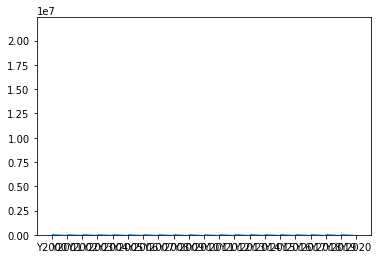

In [124]:
fig, ax = plt.subplots()
ax.stackplot(agDataOranges['Year'].to_numpy(), agDataOranges['Amount'].to_numpy(), 
             labels = agDataOranges['Label'].to_numpy())